In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EI, A_v, B_v, x = sym.symbols('EI, A_v, B_v, x')
C_1, C_2, C_3, C_4 = sym.symbols('C_1, C_2, C_3, C_4')
oo = sym.Dummy('oo', prime=True)
very_small = 1/oo
L = 10
F = 35
EI2 = sym.symbols('EI2')
ql, Vl, Ml, kappal, phil, wl = sym.symbols('q_z, V, M, kappa, phi, w')

In [3]:
q = A_v * sym.SingularityFunction(x,0,-1) + F * sym.SingularityFunction(x,L/2,-1) + B_v * sym.SingularityFunction(x,L,-1)
display(q)
V = -sym.integrate(q, x) + C_1
display(V)
M = sym.integrate(V, x) + C_2
display(M)
kappa = M/EI + 1/EI*(1-5/x)*sym.SingularityFunction(x,5,0)*(A_v*L/2) + 1/EI*(1-5/x)*sym.SingularityFunction(x,5,1)*(A_v+F)
kappa1 = M/EI
# - 1/EI*(1-1/(1+1/5*(x-5)))*sym.SingularityFunction(x,L/2,1)*(A_v+F)
display(kappa)
phi = sym.integrate(kappa, x) + C_3
# + 1/EI*(sym.SingularityFunction(x,5,1) + 5*sym.log(5/x)*sym.SingularityFunction(x,5,0))*(A_v*L/2) + 1/EI*(1+sym.log(5/x))*sym.SingularityFunction(x,5,2)*(A_v+F)
display(phi)
w = -sym.integrate(phi, x) + C_4
display(w.rewrite(x))
print(sym.latex(sym.Eq(ql,q)))
print(sym.latex(sym.Eq(Vl,V)))
print(sym.latex(sym.Eq(Ml,M)))
print(sym.latex(sym.Eq(kappal,kappa)))
print(sym.latex(sym.Eq(phil,phi)))
print(sym.latex(sym.Eq(wl,w)))

A_v*SingularityFunction(x, 0, -1) + B_v*SingularityFunction(x, 10, -1) + 35*SingularityFunction(x, 5.0, -1)

-A_v*SingularityFunction(x, 0, 0) - B_v*SingularityFunction(x, 10, 0) + C_1 - 35*SingularityFunction(x, 5.0, 0)

-A_v*SingularityFunction(x, 0, 1) - B_v*SingularityFunction(x, 10, 1) + C_1*x + C_2 - 35*SingularityFunction(x, 5.0, 1)

5*A_v*(1 - 5/x)*SingularityFunction(x, 5, 0)/EI + (1 - 5/x)*(A_v + 35)*SingularityFunction(x, 5, 1)/EI + (-A_v*SingularityFunction(x, 0, 1) - B_v*SingularityFunction(x, 10, 1) + C_1*x + C_2 - 35*SingularityFunction(x, 5.0, 1))/EI

5*A_v*(x - 5*log(x) - 5 + 5*log(5))*SingularityFunction(x, 5, 0)/EI + C_3 + (A_v + 35)*(x**2/2 - 10*x + 25*log(x) - 25*log(5) + 75/2)*SingularityFunction(x, 5, 0)/EI + (-A_v*SingularityFunction(x, 0, 2)/2 - B_v*SingularityFunction(x, 10, 2)/2 + C_1*x**2/2 + C_2*x - 35*SingularityFunction(x, 5.0, 2)/2)/EI

-5*A_v*(x**2/2 - 5*x*log(x) + 5*x*log(5) - 25/2)*SingularityFunction(x, 5, 0)/EI - C_3*x + C_4 - (A_v + 35)*(x**3/6 - 5*x**2 + 25*x*log(x) - 25*x*log(5) + 25*x/2 + 125/3)*SingularityFunction(x, 5, 0)/EI - (-A_v*SingularityFunction(x, 0, 3)/6 - B_v*SingularityFunction(x, 10, 3)/6 + C_1*x**3/6 + C_2*x**2/2 - 35*SingularityFunction(x, 5.0, 3)/6)/EI

q_{z} = A_{v} {\left\langle x \right\rangle}^{-1} + B_{v} {\left\langle x - 10 \right\rangle}^{-1} + 35 {\left\langle x - 5.0 \right\rangle}^{-1}
V = - A_{v} {\left\langle x \right\rangle}^{0} - B_{v} {\left\langle x - 10 \right\rangle}^{0} + C_{1} - 35 {\left\langle x - 5.0 \right\rangle}^{0}
M = - A_{v} {\left\langle x \right\rangle}^{1} - B_{v} {\left\langle x - 10 \right\rangle}^{1} + C_{1} x + C_{2} - 35 {\left\langle x - 5.0 \right\rangle}^{1}
\kappa = \frac{5 A_{v} \left(1 - \frac{5}{x}\right) {\left\langle x - 5 \right\rangle}^{0}}{EI} + \frac{\left(1 - \frac{5}{x}\right) \left(A_{v} + 35\right) {\left\langle x - 5 \right\rangle}^{1}}{EI} + \frac{- A_{v} {\left\langle x \right\rangle}^{1} - B_{v} {\left\langle x - 10 \right\rangle}^{1} + C_{1} x + C_{2} - 35 {\left\langle x - 5.0 \right\rangle}^{1}}{EI}
\phi = \frac{5 A_{v} \left(x - 5 \log{\left(x \right)} - 5 + 5 \log{\left(5 \right)}\right) {\left\langle x - 5 \right\rangle}^{0}}{EI} + C_{3} + \frac{\left(A_{v} + 35\right) \

In [4]:
eq1 = sym.Eq(M.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,0-very_small),0).subs(oo,sym.oo)
eq3 = sym.Eq(M.subs(x,L),0)
eq4 = sym.Eq(w.subs(x,L),0)
eq5 = sym.Eq(V.subs(x,0-very_small),0).subs(oo,sym.oo)
eq6 = sym.Eq(V.subs(x,L+very_small),0).subs(oo,sym.oo)
display(eq1, eq2, eq3, eq4, eq5, eq6)
print(sym.latex(eq1))
print(sym.latex(eq3))
print(sym.latex(eq2))
print(sym.latex(eq4))
print(sym.latex(eq5))
print(sym.latex(eq6))

Eq(C_2, 0)

Eq(C_4, 0)

Eq(-10*A_v + 10*C_1 + C_2 - 175.0, 0)

Eq(-5*A_v*(-50*log(10) + 75/2 + 50*log(5))/EI - 10*C_3 + C_4 - (A_v + 35)*(-250*log(5) - 500/3 + 250*log(10))/EI - (-500*A_v/3 + 500*C_1/3 + 50*C_2 - 729.166666666667)/EI, 0)

Eq(C_1, 0)

Eq(-A_v - B_v + C_1 - 35, 0)

C_{2} = 0
- 10 A_{v} + 10 C_{1} + C_{2} - 175.0 = 0
C_{4} = 0
- \frac{5 A_{v} \left(- 50 \log{\left(10 \right)} + \frac{75}{2} + 50 \log{\left(5 \right)}\right)}{EI} - 10 C_{3} + C_{4} - \frac{\left(A_{v} + 35\right) \left(- 250 \log{\left(5 \right)} - \frac{500}{3} + 250 \log{\left(10 \right)}\right)}{EI} - \frac{- \frac{500 A_{v}}{3} + \frac{500 C_{1}}{3} + 50 C_{2} - 729.166666666667}{EI} = 0
C_{1} = 0
- A_{v} - B_{v} + C_{1} - 35 = 0


In [5]:
sol = sym.solve((eq1,eq2,eq3,eq4,eq5,eq6),(C_1,C_2,C_3,C_4,A_v,B_v))
display(sol)
display(w.subs(sol).factor(EI))
print(sym.latex(sol))

{C_1: 0.0,
 C_2: 0.0,
 C_3: -205.462116323286/EI,
 C_4: 0.0,
 A_v: -17.5000000000000,
 B_v: -17.5000000000000}

(-17.5*x**3*SingularityFunction(x, 5, 0) + 787.5*x**2*SingularityFunction(x, 5, 0) - 5250.0*x*log(x)*SingularityFunction(x, 5, 0) - 1312.5*x*SingularityFunction(x, 5, 0) + 5250.0*x*log(5)*SingularityFunction(x, 5, 0) + 1232.77269793971*x - 17.5*SingularityFunction(x, 0, 3) - 10937.5*SingularityFunction(x, 5, 0) + 35*SingularityFunction(x, 5.0, 3) - 17.5*SingularityFunction(x, 10, 3))/(6*EI)

\left\{ A_{v} : -17.5, \  B_{v} : -17.5, \  C_{1} : 0.0, \  C_{2} : 0.0, \  C_{3} : - \frac{205.462116323286}{EI}, \  C_{4} : 0.0\right\}


In [6]:
w_numpy = sym.lambdify(x, w.subs(sol).subs(EI,10000).subs(EI2,20000).rewrite(sym.Piecewise))

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in log
  return 0.0205462116323286*x + 0.00875*((1/2)*x**2 - 5*x*log(x) + 5*x*log(5) - 25/2)*select([greater(x, 5),True], [1,0], default=nan) - 0.00175*((1/6)*x**3 - 5*x**2 + 25*x*log(x) - 25*x*log(5) + (25/2)*x + 125/3)*select([greater(x, 5),True], [1,0], default=nan) - 0.000291666666666667*select([greater(x, 0),True], [x**3,0], default=nan) + (7/12000)*select([greater(x - 5.0, 0),True], [125.0*(0.2*x - 1)**3,0], default=nan) - 0.000291666666666667*select([greater(x, 10),True], [(x - 10)**3,0], default=nan)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in multiply
  return 0.0205462116323286*x + 0.00875*((1/2)*x**2 - 5*x*log(x) + 5*x*log(5) - 25/2)*select([greater(x, 5),True], [1,0], default=nan) - 0.00175*((1/6)*x**3 - 5*x**2 + 25*x*log(x) - 25*x*log(5) + (25/2)*x + 125/3)*select([greater(x, 5),True], [1,0], default=nan) - 0.000291666666666667*select([greater(x, 0),True], [x**3,0], default=nan) +

0.06627272482830962
0.04665771610574422


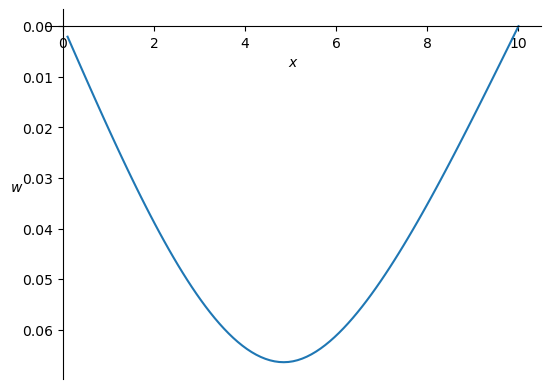

In [7]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,w_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$w$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
print(w_numpy(5))
print(w_numpy(7.24562))

In [8]:
V_numpy = sym.lambdify(x, V.subs(sol).subs(EI,10000).subs(EI2,20000).rewrite(sym.Piecewise))

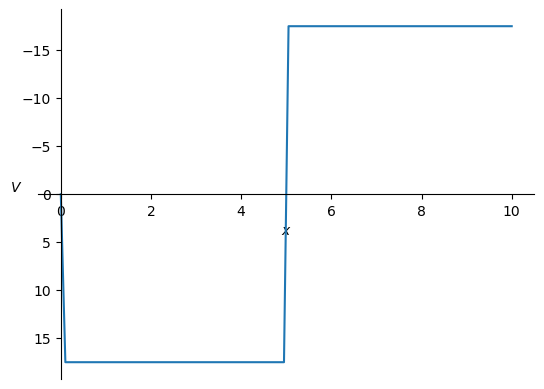

In [9]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,V_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$V$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [10]:
M_numpy = sym.lambdify(x, M.subs(sol).subs(EI,10000).subs(EI2,20000).rewrite(sym.Piecewise))

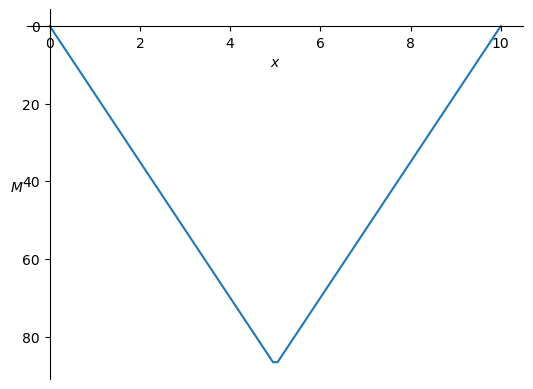

In [11]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,M_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$M$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [12]:
kappa_numpy = sym.lambdify(x, kappa.subs(sol).subs(EI,10000).subs(EI2,20000).rewrite(sym.Piecewise))
a = (35/2)*(1/2)*(1/x)*sym.SingularityFunction(x,5,2)/10000
a1 = sym.lambdify(x, a.subs(sol).subs(EI,10000).subs(EI2,20000).rewrite(sym.Piecewise))
display(a)

0.000875*SingularityFunction(x, 5, 2)/x

<lambdifygenerated-4>:2: RuntimeWarning: divide by zero encountered in divide
  return -0.00875*(1 - 5/x)*select([greater(x, 5),True], [1,0], default=nan) + 0.00175*(1 - 5/x)*select([greater(x, 5),True], [x - 5,0], default=nan) + 0.00175*select([greater(x, 0),True], [x,0], default=nan) + 0.00175*select([greater(x, 10),True], [x - 10,0], default=nan) - 7/2000*select([greater(x - 5.0, 0),True], [x - 5.0,0], default=nan)
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in multiply
  return -0.00875*(1 - 5/x)*select([greater(x, 5),True], [1,0], default=nan) + 0.00175*(1 - 5/x)*select([greater(x, 5),True], [x - 5,0], default=nan) + 0.00175*select([greater(x, 0),True], [x,0], default=nan) + 0.00175*select([greater(x, 10),True], [x - 10,0], default=nan) - 7/2000*select([greater(x - 5.0, 0),True], [x - 5.0,0], default=nan)


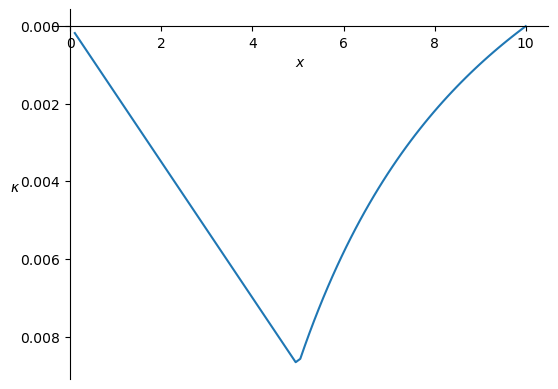

In [37]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,kappa_numpy(x_numpy))
# plt.plot(x_numpy, a1(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$\kappa$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [14]:
display(w.subs(sol).subs(EI,10000).subs(EI2,20000))
print(w_numpy(5))
print(kappa_numpy(10))
print(kappa_numpy(5))
print(kappa_numpy(7))
phi_numpy = sym.lambdify(x, phi.subs(sol).subs(EI,10000).subs(EI2,20000).rewrite(sym.Piecewise))
print(phi_numpy(6))


0.0205462116323286*x + 0.00875*(x**2/2 - 5*x*log(x) + 5*x*log(5) - 25/2)*SingularityFunction(x, 5, 0) - 0.00175*(x**3/6 - 5*x**2 + 25*x*log(x) - 25*x*log(5) + 25*x/2 + 125/3)*SingularityFunction(x, 5, 0) - 0.000291666666666667*SingularityFunction(x, 0, 3) + 7*SingularityFunction(x, 5.0, 3)/12000 - 0.000291666666666667*SingularityFunction(x, 10, 3)

0.06627272482830962
0.0
0.00875
0.0037500000000000007
0.008531924587142428


In [15]:
print(w.subs(sol).subs(EI,10000))

0.0205462116323286*x + 0.00875*(x**2/2 - 5*x*log(x) + 5*x*log(5) - 25/2)*SingularityFunction(x, 5, 0) - 0.00175*(x**3/6 - 5*x**2 + 25*x*log(x) - 25*x*log(5) + 25*x/2 + 125/3)*SingularityFunction(x, 5, 0) - 0.000291666666666667*SingularityFunction(x, 0, 3) + 7*SingularityFunction(x, 5.0, 3)/12000 - 0.000291666666666667*SingularityFunction(x, 10, 3)


In [16]:
print(w_numpy(7))

0.05002590316247386


In [17]:
print(kappa_numpy(5))
print(M_numpy(5))

0.00875
87.5


In [18]:
x = sym.symbols('x')
a = sym.SingularityFunction(5,5,-1)
display(a)
print(a)

oo

oo
